# Lead Scoring Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

A typical lead conversion process can be represented using the following funnel:
<img style="float: right;" src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

# Importing and Understanding data

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries for now
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Display all 37 columns
pd.set_option('display.max_columns', 50)

In [4]:
# Importing Lead dataset
df = pd.read_csv("Leads.csv")
df.head(4)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified


In [5]:
# Check shape of the dataframe 'df'
df.shape

(9240, 37)

In [6]:
# Check the summary statistics of the dataframe 'df'
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check column data types and nullability
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

## Handling NULL data

In [8]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

### Dropping columns with NULL values above 3000 (~32%)

In [9]:
# Printing the list of columns that need to be removed
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        print(col, df[col].isnull().sum())

Tags 3353
Lead Quality 4767
Asymmetrique Activity Index 4218
Asymmetrique Profile Index 4218
Asymmetrique Activity Score 4218
Asymmetrique Profile Score 4218


In [10]:
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, axis=1, inplace=True)

In [11]:
# Checking if the shape has changed post column removal
df.shape

(9240, 31)

We can see that ***6*** columns have been removed from `df`

## Removing unnecessary columns

As the company sells online courses, it doesn't really matter which country or city the students are from. So, both `City` and `Country` columns are not necessary for this analysis and hence we will be removing them from the dataframe "df"

In [12]:
df.drop(['Country','City'], axis=1, inplace=True)

In [13]:
df.shape

(9240, 29)

City and Country columns have been removed from "df"

We will also remove the columns `Prospect ID` and `Lead Number` as these are simply unique identifiers for the customers and lead. Due to this, they will not provide any value addition to our model

In [14]:
df.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

In [15]:
df.shape

(9240, 27)

## Handling columns with less variance & columns with large values of 'select'

- There are columns where the variance is very less (i.e. most of the values are either Yes/No). In such cases, the model will not be able to provide any useful results because there is no learning for the model. We will remove these columns from `df`.
- Additionally, there are columns where large portion of the data is having the value 'select'. This means that the user did not select any value for the field. We will check and remove such columns as well from `df`.

In [16]:
# Checking distinct values for each column
for x in df.columns:
    print(df[x].astype('category').value_counts())
    print("\n\n--------------------------------------------------------------------------\n\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


--------------------------------------------------------------------------


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64


--------------------------------------------------------------------------


No     8506
Yes     734
Name: Do Not Email, dtype: int64


-------------

After going through the above results manually, we will be dropping the following columns based on the two criterion mentioned below:

**Below columns with very less variance should be dropped**
- 'Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
                
**Below columns have >= 50% "select" values and they should be dropped**
- 'How did you hear about X Education','Lead Profile'

In [17]:
# Adding the to-be dropped columns to a list
drop_cols_var = ['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
drop_cols_select = ['How did you hear about X Education','Lead Profile']

In [18]:
print(len(drop_cols_var))
print(len(drop_cols_select))

13
2


Total columns to be dropped are ***15***

In [19]:
# Dropping less variance columns
df.drop(drop_cols_var, axis=1, inplace=True)

# Dropping columns with 'select' values >= 50%
df.drop(drop_cols_select, axis=1, inplace=True)

In [20]:
# Checking the count of remaining columns post removal
df.shape

(9240, 12)

We are left with ***14*** columns in the dataframe `df`

In [21]:
# Checking top 4 rows of "df"
df.head(4)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified


## Checking NULL values with remaining columns

In [22]:
df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Only *6* columns have NULL values now

### `What is your current occupation` - handling NULL values

In [23]:
df['What is your current occupation'].value_counts(ascending=False)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
df['What is your current occupation'].isna().sum()

2690

As this seems to be an important predictor, we will remove the rows which are NULL from the dataframe `df`

In [25]:
# Getting the NOT NULL values from the column 'What is your current occupation' and assigning it back to 'df'
df = df[~pd.isna(df['What is your current occupation'])]

In [26]:
# Checking the rows left in "df"
df.shape

(6550, 12)

In [27]:
df.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

### `TotalVisits` - handling NULL values

In [28]:
df['TotalVisits'].isna().sum()

130

As this seems to be an important predictor, we will remove the rows which are NULL from the dataframe `df`

In [29]:
# Getting the NOT NULL values from the column 'TotalVisits' and assigning it back to 'df'
df = df[~pd.isna(df['TotalVisits'])]

In [30]:
# Checking the rows left in "df"
df.shape

(6420, 12)

In [31]:
df.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

### `Lead Source` - handling NULL values

In [32]:
df['Lead Source'].isna().sum()

29

As this seems to be an important predictor, we will remove the rows which are NULL from the dataframe `df`

In [33]:
# Getting the NOT NULL values from the column 'Lead Source' and assigning it back to 'df'
df = df[~pd.isna(df['Lead Source'])]

In [34]:
# Checking the rows left in "df"
df.shape

(6391, 12)

In [35]:
df.isnull().sum().sort_values(ascending=False)

Specialization                            18
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

### `Specialization` - handling NULL values

In [36]:
df['Specialization'].isna().sum()

18

As this seems to be an important predictor, we will remove the rows which are NULL from the dataframe `df`

In [37]:
# Getting the NOT NULL values from the column 'Specialization' and assigning it back to 'df'
df = df[~pd.isna(df['Specialization'])]

In [38]:
# Checking the rows left in "df"
df.shape

(6373, 12)

In [39]:
df.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

We are not left with any NULL values in the columns

In [40]:
# Checking top 5 rows in the dataframe "df"
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

# Data Preparation

## Converting binary categorical variables (Yes,No) to (1,0)

In [42]:
df['Do Not Email'].value_counts()

No     5938
Yes     435
Name: Do Not Email, dtype: int64

In [43]:
df['A free copy of Mastering The Interview'].value_counts()

No     4202
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64

In [44]:
# List of binary variables
varlist = ['Do Not Email','A free copy of Mastering The Interview']

# Map function for conversion
def binary_map(x):
    return x.map({'Yes':1,'No':0})

# Apply Map function to the binary variables
df[varlist] = df[varlist].apply(binary_map)

In [45]:
# Check if the binary variables are converted to 1's and 0's
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   int64  
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   int6

## For categorical features with multiple levels, create dummy features (One-Hot Encoding)

In [47]:
# Get the list of categorical variables
df.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [48]:
# Checking distinct values for each categorical column
for x in df.select_dtypes(include='object').columns:
    print(df[x].value_counts())
    print("\n\n--------------------------------------------------------------------------\n\n")

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64


--------------------------------------------------------------------------


Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
WeLearn                 1
testone                 1
Pay per Click Ads       1
Press_Release           1
Name: Lead Source, dtype: int64


--------------------------------------------------------------------------


Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visited on Website          427
Converted to Lead                292
Email Link Clicked               178
Email Bounce

We will create dummy variables for all columns except `Specialization` as it still contains "select" and must be handled separately

In [49]:
# Create dummy variables for all columns except 'Specialization' and drop the first one
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 
                                 'What is your current occupation', 'Last Notable Activity']], drop_first=True)

# Add the results to the dataframe
df = pd.concat([df,dummy1], axis=1)

In [50]:
# Checking if the dummy variables have been added to the DataFrame 'df'
df.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Handling dummy variable creation for 'Specialization' column

In [51]:
# Creating dummy variables for "Specialization" and dropping the level with 'select'.

# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(df['Specialization'], prefix='Specialization')
# Dropping "Specialization_Select" column
ml1 = ml.drop(['Specialization_Select'], 1)
#Adding the results to the master dataframe 'df'
df = pd.concat([df,ml1], axis=1)

In [52]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Drop the categorical variables for which we have created dummies

In [53]:
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'], axis=1, inplace=True)

In [54]:
df.shape

(6373, 75)

In [55]:
df.head(3)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are **75** columns post dummy variable creation

# Modeling

In [56]:
# Add feature variables to X
X = df.drop('Converted', axis=1)

In [57]:
# Add response variable to y
y = df['Converted']

## Train | Test Split and Scaling

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling (Min Max Scaler)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6373 non-null   int64  
 1   Converted                                             6373 non-null   int64  
 2   TotalVisits                                           6373 non-null   float64
 3   Total Time Spent on Website                           6373 non-null   int64  
 4   Page Views Per Visit                                  6373 non-null   float64
 5   A free copy of Mastering The Interview                6373 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 8   Lead Origin_Lead Import                               6373

In [61]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
df.select_dtypes(exclude='uint8')

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0.0,0,0.00,0
1,0,0,5.0,674,2.50,0
2,0,1,2.0,1532,2.00,1
3,0,0,1.0,305,1.00,0
4,0,1,2.0,1428,1.00,0
...,...,...,...,...,...,...
9234,0,1,5.0,210,2.50,0
9235,1,1,8.0,1845,2.67,0
9236,0,0,2.0,238,2.00,1
9237,1,0,2.0,199,2.00,1


In [63]:
# Getting the list of numerical features from df
num_feat = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(num_feat)
print(len(num_feat))

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
3


In [64]:
# Import sklearn library for StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of StandardScaler
scaler = MinMaxScaler()

# Perform fit and transform on the X_train dataset
X_train[num_feat] = scaler.fit_transform(X_train[num_feat])

# Perform only transform on the X_test dataset
X_test[num_feat] = scaler.transform(X_test[num_feat])

In [65]:
# Checking Lead Conversion Rate
conversion_rate = (sum(df['Converted']) / len(df['Converted'].index)) * 100

conversion_rate

48.093519535540565

We have almost ~48% conversion rate

## Looking at Correlations

In [66]:
# This is to mask the contents of the uppper half of the heatmap
mask = np.array(df.corr())

mask

array([[ 1.        , -0.14845071,  0.02890004, ...,  0.04273764,
        -0.00542174,  0.04871098],
       [-0.14845071,  1.        ,  0.00565126, ..., -0.00514155,
         0.00578475, -0.01176208],
       [ 0.02890004,  0.00565126,  1.        , ...,  0.0151141 ,
         0.06338263,  0.06438374],
       ...,
       [ 0.04273764, -0.00514155,  0.0151141 , ...,  1.        ,
        -0.01332675, -0.00970979],
       [-0.00542174,  0.00578475,  0.06338263, ..., -0.01332675,
         1.        , -0.03285723],
       [ 0.04871098, -0.01176208,  0.06438374, ..., -0.00970979,
        -0.03285723,  1.        ]])

In [67]:
corr_df1 = df.corr()
corr_df1.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Do Not Email,1.000000,-0.148451,0.028900,-0.054778,0.036723,0.052271,0.081123,-0.027360,-0.017655,0.086261,-0.017980,-0.058344,-0.004796,-0.035661,0.030114,-0.003391,0.046285,-0.034833,-0.012227,-0.004796,-0.003391,0.009698,-0.005874,-0.003391,-0.056334,...,0.077136,-0.006807,0.050062,-0.003515,-0.015930,0.258311,-0.003391,-0.016042,-0.009139,0.023295,0.036547,-0.007458,0.021217,0.015065,-0.017078,0.048816,0.011698,-0.029050,0.011938,-0.012156,0.020802,0.026478,0.042738,-0.005422,0.048711
Converted,-0.148451,1.000000,0.005651,0.313338,-0.063362,-0.094833,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,0.018407,-0.044348,-0.034223,-0.012059,-0.012059,0.243200,-0.023501,0.000676,0.013015,0.144864,-0.006411,-0.012059,-0.138834,...,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673,-0.012059,0.036229,0.014468,-0.017955,-0.015443,0.027078,0.028249,-0.006080,0.025865,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.028900,0.005651,1.000000,0.202551,0.489039,0.186583,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,-0.012720,-0.247963,0.192469,-0.001549,0.005896,-0.180458,0.078163,-0.003946,-0.004031,-0.097011,-0.004116,0.003414,-0.074517,...,-0.088690,-0.004994,0.226728,-0.028923,0.002792,0.001631,0.010859,0.042269,0.035184,0.015248,0.019003,0.031922,0.027640,0.016549,0.032934,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,-0.054778,0.313338,0.202551,1.000000,0.303870,0.154256,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,-0.016774,-0.320143,0.078956,-0.009090,-0.003927,-0.214864,0.017643,0.000557,0.014377,-0.119563,-0.012549,-0.005124,-0.024604,...,-0.107230,-0.009837,0.035147,0.082950,0.010331,0.001504,-0.009888,0.027925,0.051841,0.003934,-0.004325,0.060133,0.021332,0.026204,0.038074,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,0.036723,-0.063362,0.489039,0.303870,1.000000,0.251474,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,-0.020279,-0.423570,0.301139,0.003003,0.020345,-0.293623,0.085383,0.000160,-0.002777,-0.157186,-0.001473,0.000113,-0.071321,...,-0.075318,-0.042338,0.017507,0.031327,0.015233,0.028551,0.001096,0.074643,0.034366,0.036748,0.039288,0.062656,0.031647,0.025231,0.049113,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284


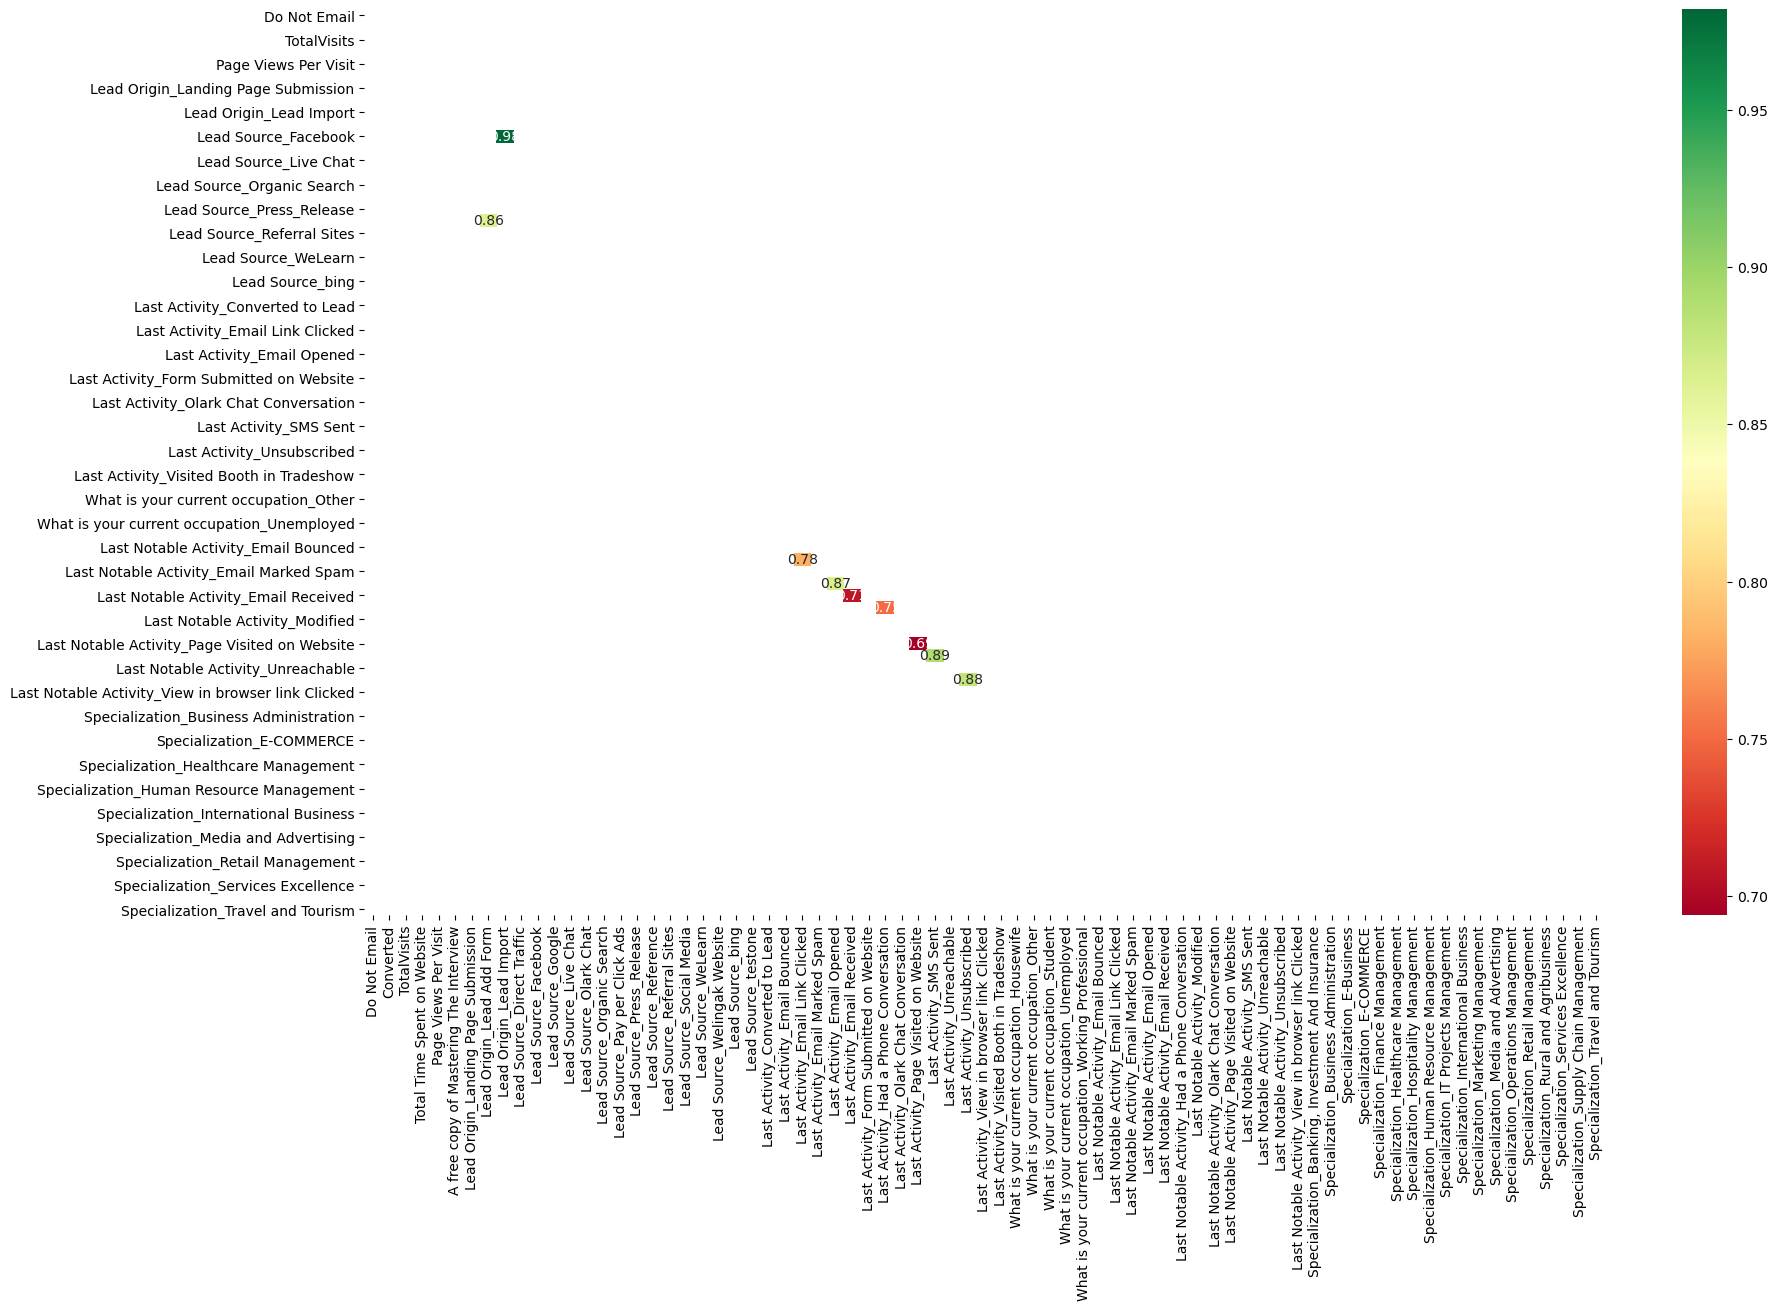

In [68]:
# Looking at places where the correlation is above 60%
plt.figure(figsize = (20,12),dpi=100)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(data = corr_df1[(corr_df1 >= 0.6) & (corr_df1 <= 0.9999)], annot = True, 
            cmap = "RdYlGn", cbar = True, fmt='.2f', mask=mask)
plt.show()

Getting the list of columns with 60% or above correlations

In [69]:
corr_df1[(corr_df1 >= 0.6) & (corr_df1 <= 0.9999)].unstack().sort_values(ascending = False).head(18)

Lead Origin_Lead Import                         Lead Source_Facebook                              0.981903
Lead Source_Facebook                            Lead Origin_Lead Import                           0.981903
Last Activity_SMS Sent                          Last Notable Activity_SMS Sent                    0.890591
Last Notable Activity_SMS Sent                  Last Activity_SMS Sent                            0.890591
Last Activity_Unsubscribed                      Last Notable Activity_Unsubscribed                0.879716
Last Notable Activity_Unsubscribed              Last Activity_Unsubscribed                        0.879716
Last Activity_Email Opened                      Last Notable Activity_Email Opened                0.866192
Last Notable Activity_Email Opened              Last Activity_Email Opened                        0.866192
Lead Source_Reference                           Lead Origin_Lead Add Form                         0.862980
Lead Origin_Lead Add Form            

# Model Building

As the dataset has **74** feature variables, we will get a subset of 15 important features using RFE. Before that, let's look at the model with all variables

## Model 1
Assessing the model with statsmodels

In [70]:
# Import library from statsmodels
import statsmodels.api as sm

In [71]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)),  family=sm.families.Binomial())

In [72]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4392
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 31 Jan 2022   Deviance:                   1.1752e+05
Time:                        12:20:11   Pearson chi2:                 5.75e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -2.964e+15   8.84e+07  -3.35e+07      0.000   -2.96e+15   -2.96e+15
Do Not Email                                         -7.178e+14   5.42e+06  -1.32e+08      0.000   -7.18e+14   -7.18e+14
TotalVisits                                           4.504e+15    5.4e+07   8.34e+07      0.000     4.5e+15     4.5e+15
Total Time Spent on Website                           1.791e+14   4.67e+06   3.84e+07      0.000    1.79e+14    1.79e+14
Page Views Per Visit                                  3.454e+14   1.16e+07   2.99e+07      0.000    3.45e+14    3.45e+14
A free copy of Mastering The Interview                1.695e+14   3.09e+06   5.48e+07      0.000     1.7e+14     1.7e+14
Lead Origin_Landing Page Submission                  -9.187e+14   3.81e+06  -2.41e+08      0.000   -9.19e+14   -9.19e+14
Lead Origin_Lead Add Form                             4.463e+15   4.77e+07   9.37e+07      0.000    4.46e+15    4.46e+15
Lead Origin_Lead Import                               4.694e+15   4.21e+07   1.12e+08      0.000    4.69e+15    4.69e+15
Lead Source_Direct Traffic                            8.899e+15   8.26e+07   1.08e+08      0.000     8.9e+15     8.9e+15
Lead Source_Facebook                                  4.694e+15   4.21e+07   1.12e+08      0.000    4.69e+15    4.69e+15
Lead Source_Google                                    8.864e+15   8.25e+07   1.07e+08      0.000    8.86e+15    8.86e+15
Lead Source_Live Chat                                 8.809e+15   8.24e+07   1.07e+08      0.000    8.81e+15    8.81e+15
Lead Source_Olark Chat                                9.928e+15   8.25e+07    1.2e+08      0.000    9.93e+15    9.93e+15
Lead Source_Organic Search                            8.834e+15   8.26e+07   1.07e+08      0.000    8.83e+15    8.83e+15
Lead Source_Pay per Click Ads                         5.033e+15   1.06e+08   4.73e+07      0.000    5.03e+15    5.03e+15
Lead Source_Press_Release                             5.942e+15   1.07e+08   5.55e+07      0.000    5.94e+15    5.94e+15
Lead Source_Reference                                 4.585e+15   6.74e+07    6.8e+07      0.000    4.59e+15    4.59e+15
Lead Source_Referral Sites                            8.434e+15   8.31e+07   1.02e+08      0.000    8.43e+15    8.43e+15
Lead Source_Social Media                              -137.3529   1.88e-06  -7.32e+07      0.000    -137.353    -137.353
Lead Source_WeLearn                                   1.405e+16   1.06e+08   1.32e+08      0.000    1.41e+16    1.41e+16
Lead Source_Welingak Website                          5.266e+15   6.77e+07   7.78e+07      0.000    5.27e+15    5.27e+15
Lead Source_bing                                      4.91

## Feature Selection using RFE

In [73]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [74]:
logreg = LogisticRegression(solver='liblinear')

In [75]:
# Importing RFE from sklearn
from sklearn.feature_selection import RFE

In [76]:
# Selection of 15 features by RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
# Looking at the feature names selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Get only the columns selected by RFE
col = X_train.columns[ rfe.support_ ]

In [ ]:
col

In [ ]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

## Model 2

In [ ]:
X_train_sm = sm.add_constant(X_train[col])

In [ ]:
# Second model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

In [ ]:
# Fitting the model
res = logm2.fit()

In [ ]:
# Checking the summary of model statistics
res.summary()

### Check VIFs

In [ ]:
# import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that contains the names of all the feature variables and their corresponding VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

There are 3 variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.
We will start by dropping the variable 'Lead Source_Reference' as it has high VIF and high p-value (> 0.05)

In [ ]:
col = col.drop('Lead Source_Reference', 1)
len(col)

## Model3

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

### Check VIFs

In [ ]:
# import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that contains the names of all the feature variables and their corresponding VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

We can see that all VIF values are less than 5. <br>
So, we will start dropping columns with high p-values: <br>
Column to be dropped - `Last Notable Activity_Had a Phone Conversation`

In [ ]:
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
len(col)

## Model 4

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

Column to be dropped with high p-value - `What is your current occupation_Housewife`

In [ ]:
col = col.drop('What is your current occupation_Housewife', 1)
len(col)

## Model 5

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

Column to be dropped with high p-value - `What is your current occupation_Working Professional`

In [ ]:
col = col.drop('What is your current occupation_Working Professional', 1)
len(col)

## Model 6

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

All p-values are now < 0.05. We will again check VIF to make sure it's less than 5

### Check VIFs

In [ ]:
# Create a dataframe that contains the names of all the feature variables and their corresponding VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

# Model Evaluation

In [ ]:
X_train_sm.shape

In [ ]:
# Predicting probabilities on the Train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

## Create a dataframe with y_train (target value) and y_train_pred (predicted probability)

In [ ]:
y_train_pred_final = pd.DataFrame({"Converted": y_train.values, "Conversion_Prob": y_train_pred})
y_train_pred_final.head()

## Create new column "Predicted" with 1 if 'Conversion_Prob' > 0.5 else 0

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

## Evaluation

In [ ]:
# For evaluation metrics, import metrics from sklearn
from sklearn import metrics

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

In [ ]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

| Actual/Predicted | Not Converted | Converted |
| --- | --- | --- |
| Not Converted | 1929   | 383 |
| Converted | 560     | 1589 |

In [ ]:
# Evaluation of other metrics than accuracy

TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [ ]:
# Calculating Sensitivity of the model
TP / (TP + FN)

In [ ]:
# Calculating Specificity of the model
TN / (TN + FP)

In [ ]:
# Calculating False Positive rate (i.e. Predicting Churn when the Customer has not Churned)
print(FP / float(TN + FP))

In [ ]:
# Calculating Positive Predictive rate (i.e. Rate of identifying Actual Churn as Churn) (also called "Precision")
print(TP / float(TP + FP))

In [ ]:
# Calculating Negative Predictive rate (i.e. Rate of identifying Actual Non-Churn as Non-Churn)
print(TN / float(TN + FN))

## Plotting ROC curve

An ROC (Receiver Operating Characteristic) curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We have the Area Under the Curve as 0.86 which is a good model. So, we will go ahead and find the Optimal Cut-off Point based on Sensivitivity V/S Specificity trade-off

## Finding the Optimal cut-off point

Since 0.5 is an arbitrary cut-off chosen by us, we want to find the Optimal cut-off point where sensitivity and specificity are balanced

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
y_train_pred_final.head(20)

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## `0.43` is the optimal cut-off point based on the intersection values in above curve

In [ ]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

## Precision and Recall

In [ ]:
# Creating a confusion matrix
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf

In [ ]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

## Precision and Recall trade-off

In [ ]:
# Import precision_recall_curve from sklearn
from sklearn.metrics import precision_recall_curve

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Even with Precision and Recall, we get the optimal cut-off at `0.43`

## Making Predictions on the test set

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
# Adding intercept to the test set
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

y_pred_final.head()

In [ ]:
# As optimal cut-off point is 0.43 (where "Sensitivity" and "Specificity" intersect)
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

# Model Performance

| Train/Test | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| Train | 0.7895  | 0.7854 | 0.7932 | 
| Test  | 0.7850  | 0.7751 | 0.7941 |

# Calculating Lead Score

In [ ]:
y_pred_final['Lead Score'] = y_pred_final['Conversion_Prob'].apply(lambda x: round(x*100, 1))

In [ ]:
y_pred_final.head(20)

The above table contains the lead score which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted